# Exploratory Data Analysis Intro Code Bank

EDA is an approach to analyze datasets to summarize their main characteristics, often with visual means. This notebook will go over basic steps in coding and some visuals on a toy dataset so that I can copy the code elsewhere easily when creating my projects 

### This Notebook uses the Iris Dataset

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn import datasets
iris = datasets.load_iris()

In [73]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [74]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Summary Statistics 

Summary statistics about each bivariate feature. This helps use get a first look at each specific attribute in the data. 

In [48]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [49]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [50]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [51]:
# Other interesting summary statistics are :

#Median
np.median(df['sepal length (cm)'])

# Idk think of more

5.8

# Univariate Analysis

First, we are going to analyze data over a single variable/column from a dataset, it is known as Univariate Analysis

## Bar Plot

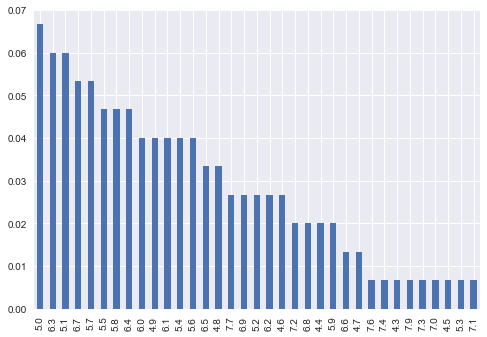

In [61]:
df['sepal length (cm)'].value_counts(normalize=True)

#plot the bar graph of percentage job categories
df['sepal length (cm)'].value_counts(normalize=True).plot.bar()
plt.show()

## Box Plot

Some outlier analysis for each value 

Text(0.5, 1.0, 'Distribution of Sepal Length')

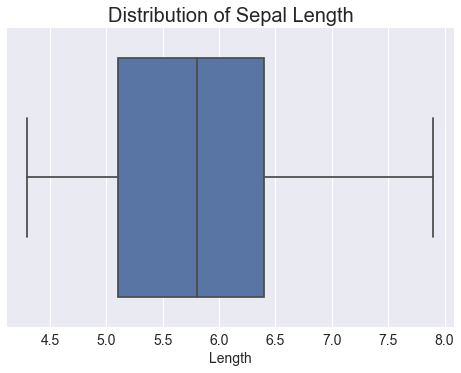

In [62]:
# Box plot 
# box plot of the variable height
ax = sns.boxplot(df['sepal length (cm)'])

# notation indicating an outlier
#ax.annotate('Outlier', xy=(0,0), xytext=(0,-0.07), fontsize=14,
            #arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))

# xtick, label, and title
plt.xticks(fontsize=14)
plt.xlabel('Length', fontsize=14)
plt.title('Distribution of Sepal Length', fontsize=20)

## DistPlot

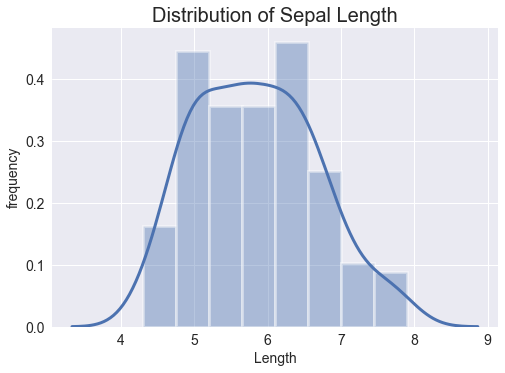

In [63]:
ax = sns.distplot(df['sepal length (cm)'], hist=True, hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})

# notation indicating a possible outlier
#ax.annotate('Possible outlier', xy=(150,0.0020), xytext=(150,0.00700), fontsize=12,
            #arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Length', fontsize=14)
plt.ylabel('frequency', fontsize=14)
plt.title('Distribution of Sepal Length', fontsize=20);

# Bivariate Analysis

Looking at two different features at a time 

## Simple ScatterPlot

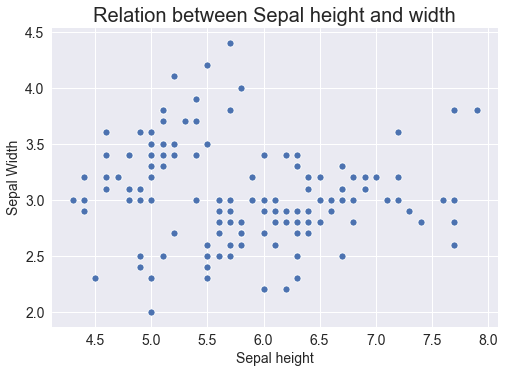

In [64]:
# scatter plot
ax = sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df, s=50)

# notations indicating an outlier
#ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
           # arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))
#ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            #arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Sepal height', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.title('Relation between Sepal height and width', fontsize=20);

## Pair Plot

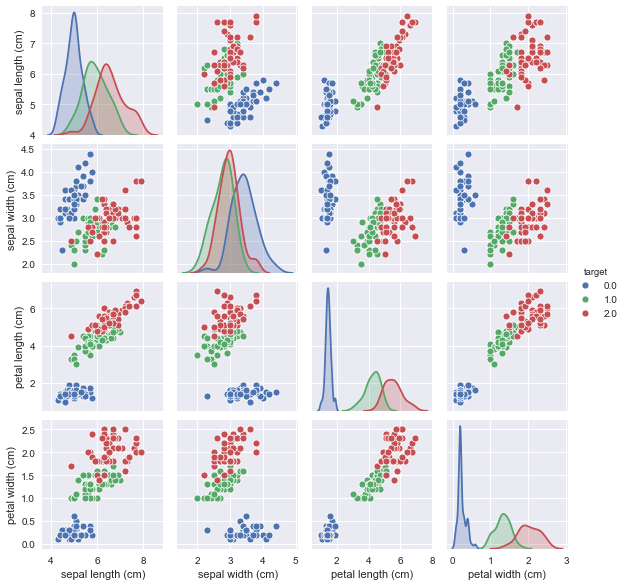

In [65]:
# Pair Plot
sns.pairplot(data = df, hue = 'target', height = 2)

## HexBin Plot

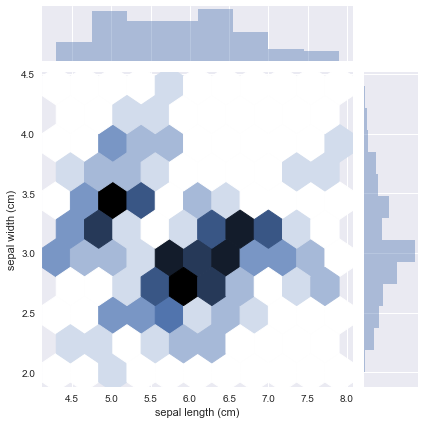

In [66]:
# Hexbin plot

sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data = df, kind = 'hex')

## Facet Grid

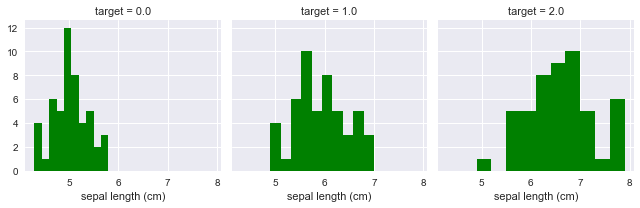

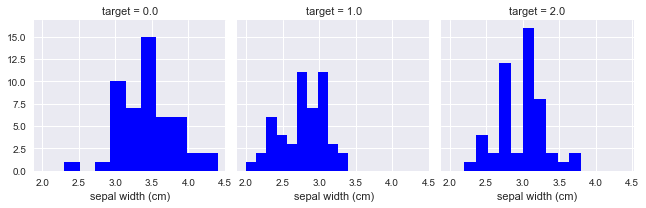

In [67]:
# Facet Grid 

# First plot statement 
plot = sns.FacetGrid(df, 
                     col = 'target', 
                     margin_titles = True)
plot.map(plt.hist, 'sepal length (cm)', color = 'green')

#Second plot statement
plot = sns.FacetGrid(df, 
                     col = 'target', 
                     margin_titles = True)
plot.map(plt.hist, 'sepal width (cm)', color = 'blue')


## Plot all Histograms on Top of One Another

Text(0.5, 0, 'Size (cm)')

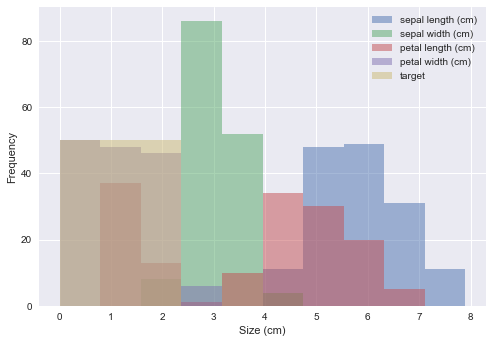

In [72]:
ax = df.plot.hist(bins = 10, alpha = 0.5)
ax.set_xlabel('Size (cm)')

## Custom Groupby Graphs

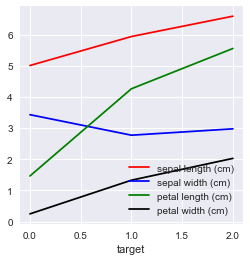

In [68]:
df.groupby('target').mean().plot(color = ['red','blue','green','black'], fontsize = 10.0, figsize=(4,4))

## Two Variable Box Plots

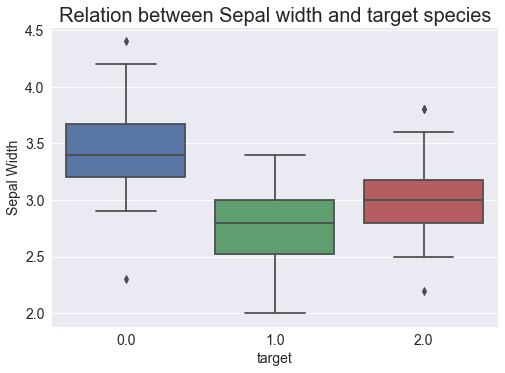

In [69]:
#plot the box plot of salary for yes & no responses.
ax = sns.boxplot(df.target, df['sepal width (cm)'])

# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('target', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.title('Relation between Sepal width and target species', fontsize=20);
plt.show()

## All Features to Target Box Plot

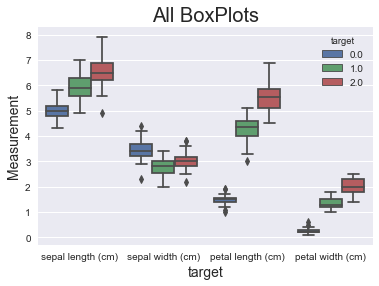

In [78]:
plot_data = (df
            .set_index('target')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns = {0: 'size', 'level_1' : 'measurement'})
            )
    
f = plt.figure(figsize = (6,4))
ax = sns.boxplot(x = 'measurement', y = 'size', hue= 'target', data = plot_data)

plt.xlabel('target', fontsize=14)
plt.ylabel('Measurement', fontsize=14)
plt.title('All BoxPlots', fontsize=20);
plt.show()

# Correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


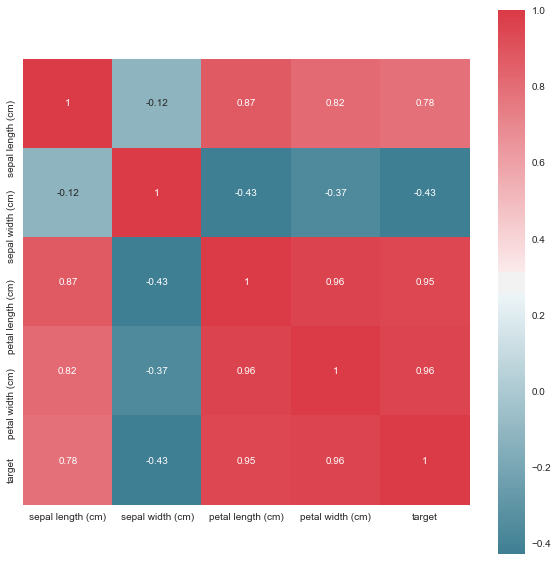

In [70]:
def plot_corr(df,threshold,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Input:
        df: pandas DataFrame
        threshold: Threshold value for correlation
        size: vertical and horizontal size of the plot
    return:
        corr: dataframe representing correlation between variables
    '''
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    newdf = df.select_dtypes(include=numerics)
    f, ax = plt.subplots(figsize=(size, size))
    corr = newdf.corr()
#     corr = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot = True, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
    return corr.style.applymap(lambda x:'background-color: #E9967A' if np.abs(x)>threshold and np.abs(x)<1  else 'color: black')

plot_corr(df,0.7,10)

# Sampling From DataFrames